In [15]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np






In [16]:
df = pd.read_csv(r"C:\Users\Kasir\Downloads\datasets-main\datasets-main\tripadvisor_hotel_reviews.csv")


df.head()






,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [17]:
df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  20491 non-null  object
 1   Rating  20491 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 320.3+ KB


In [18]:
import re

from nltk.corpus import stopwords

def clean(review):

    review = review.lower()

    review = re.sub('[^a-z A-Z 0-9-]+', '', review)

    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])

    return review



In [19]:
import nltk

nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kasir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
def clean(text):
    
    import re
    text = re.sub(r'[^\w\s]', '', text) 
    return text.lower() 


In [21]:
def corpus(text):
    return text.split() 

In [22]:
df['Review_lists'] = df['Review'].apply(corpus)


In [23]:
from tqdm import trange

corpus = [] 

for i in trange(df.shape[0], ncols=100, colour='green', smoothing=0.8):
    corpus += df['Review_lists'][i] 







100%|██████████████████████████████████████████████████████| 20491/20491 [00:00<00:00, 34571.67it/s]


In [24]:
from collections import Counter

mostCommon = Counter(corpus).most_common(10)  # Top 10 most common words
print(mostCommon)






[('hotel', 42079), ('not', 30750), ('room', 30532), ('great', 18732), ("n't", 18436), ('staff', 14950), ('good', 14791), ('did', 13433), ('just', 12458), ('stay', 11376)]


In [25]:
words = []

freq = []

for word, count in mostCommon:

    words.append(word)

    freq.append(count)






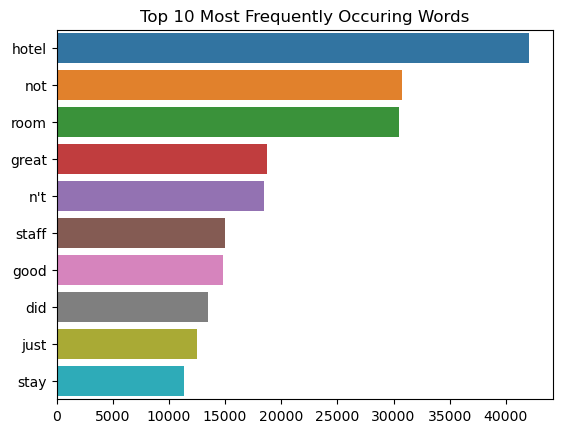

In [26]:
import seaborn as sns

sns.barplot(x=freq, y=words)

plt.title('Top 10 Most Frequently Occuring Words')

plt.show()






In [27]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(ngram_range=(2,2))

bigrams = cv.fit_transform(df['Review'])






In [28]:
count_values = bigrams.toarray().sum(axis=0)

ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()], 

                                 reverse = True))

ngram_freq.columns = ["frequency", "ngram"]






MemoryError: Unable to allocate 148. GiB for an array with shape (20491, 968796) and data type int64

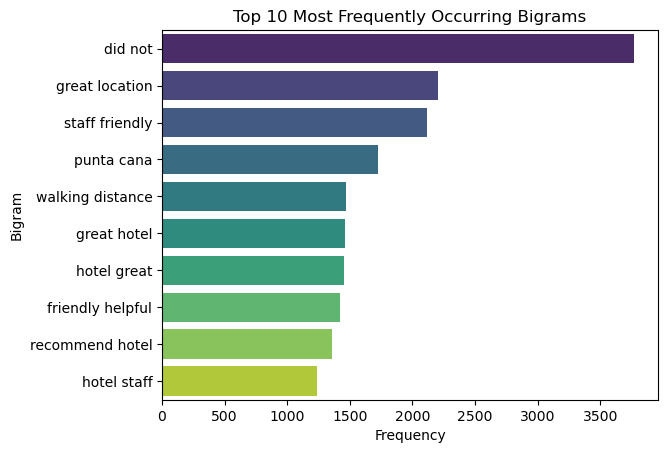

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define CountVectorizer with restricted vocabulary size
cv = CountVectorizer(ngram_range=(2, 2), max_features=5000, dtype=np.int32)

# Fit and transform the reviews
bigrams = cv.fit_transform(df['Review'])

# Sum directly without converting to a dense array
count_values = bigrams.sum(axis=0).A1

# Create DataFrame for bigram frequencies
ngram_freq = pd.DataFrame(sorted([(count_values[i], k) for k, i in cv.vocabulary_.items()],
                                 reverse=True),
                          columns=["frequency", "ngram"])

# Visualize the top 10 most frequent bigrams
sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10], palette="viridis")
plt.title('Top 10 Most Frequently Occurring Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()


In [29]:
import seaborn as sns

sns.barplot(x=ngram_freq['frequency'][:10], y=ngram_freq['ngram'][:10])

plt.title('Top 10 Most Frequently Occuring Bigrams')

plt.show()






NameError: name 'ngram_freq' is not defined